Script that imports a csv file and runs PCA using scikitlearn

In [94]:
#import different packages that are needed for analysis, scipy, numpy, scikitlearn, matplotlib
import numpy as np
import scipy
import sklearn
import matplotlib
import pandas as pd

In [95]:
#import the csv file to be used for analysis using pandas
data = pd.read_csv("dataforpca.csv")
data

,ID,s_linPPSS,i_linPPSS,r2_linPPSS,s_logPPSS,i_logPPSS,r2_logPPSS,P-AL_4b,Scattered households,Stocking density,...,Pasture land,Agricultural land,Runoff average yearly (mm),Silt_median,Silt_average,Silt_max,Clay + Silt average,Clay*arable,Clay*agricultural land,Silt*agricultural land
0,C6,0.000830,0.028550,0.820310,0.781208,-2.514948,0.824727,0.111940,10,0.05,...,1.6,60.6,220.076923,42,42.028151,60,83.791729,24.640511,25.308728,25.469060
1,E21,0.001516,0.004275,0.393449,0.777056,-2.578546,0.279182,0.275862,9,0.05,...,0.5,89.5,156.846154,32,32.528930,43,48.593446,14.297419,14.377742,29.113392
2,E23,0.000632,0.061874,0.761639,0.596143,-2.096979,0.625310,0.142251,7,0.60,...,8.0,62.0,181.000000,40,40.201626,47,80.018970,21.501366,24.686753,24.925008
3,F26,0.001564,0.025543,0.661244,0.543898,-1.975404,0.402942,0.000000,33,1.20,...,3.0,73.0,482.416667,30,29.877127,48,34.809074,3.452363,3.600321,21.810302
4,I28,0.002176,0.002388,0.385544,0.595046,-2.174473,0.381934,0.108696,11,0.50,...,2.0,86.0,156.000000,34,33.438083,49,52.071238,15.651851,16.024514,28.756751
5,M36,0.000879,0.047936,0.261654,0.529841,-1.950275,0.525143,0.300000,37,0.30,...,0.5,86.5,276.769231,29,28.515999,44,54.085693,21.989937,22.117786,24.666339
6,M42,0.001515,0.026500,0.527269,0.633800,-2.076228,0.557893,0.378947,10,0.10,...,1.5,94.5,282.111111,32,31.975635,45,47.775635,14.694000,14.931000,30.216975
7,N33,0.001171,0.018088,0.715337,0.747272,-2.387552,0.738267,0.188889,7,0.10,...,1.0,88.0,251.166667,38,36.809974,49,57.664230,18.143203,18.351745,32.392777
8,N34,0.001940,0.011621,0.353516,0.850530,-2.442853,0.676464,0.529412,19,0.40,...,0.5,85.5,371.615385,25,28.484804,50,42.391341,11.820556,11.890088,24.354508
9,O18,0.000679,0.085516,0.785446,0.780037,-2.481340,0.799125,0.040000,8,0.05,...,0.5,92.5,332.461538,51,51.002495,59,86.176408,32.360000,32.535870,47.177308


In [96]:
#create a subset of the dataframe that contains the variables I want to analyze
data1 = data[['ID','s_linPPSS','Scattered households', 'Stocking density', 'PP', 'SS', 'TP', 
             'DP', 'PP/SS', 'PP/TP', 'P-AL_average', 'Clay_average', 'Ley', 'Cereals & Rape',
             'Mixed crops', 'Agricultural land', 'Silt_average']]
data1

,ID,s_linPPSS,Scattered households,Stocking density,PP,SS,TP,DP,PP/SS,PP/TP,P-AL_average,Clay_average,Ley,Cereals & Rape,Mixed crops,Agricultural land,Silt_average
0,C6,0.000830,10,0.05,0.147711,143.571828,0.211402,0.049084,0.001029,0.614493,6.342537,41.763577,12.200566,41.047835,1.000000,60.6,42.028151
1,E21,0.001516,9,0.05,0.023619,12.691025,0.059372,0.027719,0.001861,0.488662,10.300000,16.064516,8.755979,67.217831,9.680000,89.5,32.528930
2,E23,0.000632,7,0.60,0.139681,123.637815,0.281123,0.117262,0.001130,0.461734,7.411465,39.817344,14.017762,33.998090,4.440000,62.0,40.201626
3,F26,0.001564,33,1.20,0.064427,24.859734,0.121163,0.034488,0.002592,0.541876,4.171588,4.931947,51.819896,16.130863,1.490328,73.0,29.877127
4,I28,0.002176,11,0.50,0.041287,17.815171,0.175817,0.116143,0.002318,0.256850,9.010870,18.633156,14.390921,46.287831,11.786885,86.0,33.438083
5,M36,0.000879,37,0.30,0.123560,86.192885,0.198983,0.058285,0.001434,0.545943,9.972641,25.569695,26.577911,43.378710,9.360000,86.5,28.515999
6,M42,0.001515,10,0.10,0.057806,20.606144,0.151312,0.081934,0.002805,0.374003,12.598342,15.800000,6.405501,67.474617,15.260000,94.5,31.975635
7,N33,0.001171,7,0.10,0.091692,62.037823,0.158162,0.052973,0.001478,0.571294,10.270000,20.854256,13.800388,43.469573,5.350000,88.0,36.809974
8,N34,0.001940,19,0.40,0.073074,31.746222,0.102850,0.018537,0.002302,0.698377,14.240000,13.906536,11.740334,42.059173,15.740000,85.5,28.484804
9,O18,0.000679,8,0.05,0.409405,476.885007,0.504567,0.073806,0.000858,0.653954,5.284727,35.173913,4.688829,80.133812,6.493729,92.5,51.002495


When the dataset is imported as a dataframe, plot some of the variables to look at them, before PCA

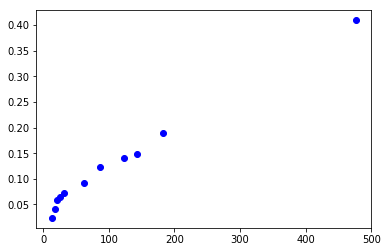

In [97]:
#make plots in the notebook
import matplotlib.pyplot as plt
%matplotlib inline
PP=data1[['PP']]
SS=data1[['SS']]
Clay=data1[['Clay_average']]
plt.plot(SS,PP, 'bo')
plt.show()

In [98]:
Clay=np.array(Clay)
SS=np.array(SS)
PP=np.array(PP)
ID = data1[['ID']]
ID

,ID
0,C6
1,E21
2,E23
3,F26
4,I28
5,M36
6,M42
7,N33
8,N34
9,O18


C:\Users\sasm0007\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


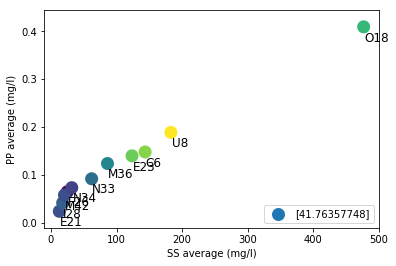

In [99]:
#create a bubbleplot instead
#set clay as colors of the bubbles (c=Clay), and increase size of bubbles with linewidth
import matplotlib.colors

plt.scatter(SS,PP, c=Clay, linewidth=7)
plt.legend(Clay, loc=4)

#label each point according to which catchment it represents
for i,area in enumerate(ID.values):
    x = SS[i]
    y = PP[i]
    plt.text(x+1.0, y-0.03, area[0], fontsize=12)
    

plt.xlabel("SS average (mg/l)")
plt.ylabel("PP average (mg/l)")
plt.show()

In [105]:
#Import PCA package
from sklearn.decomposition import PCA
from sklearn import preprocessing

#for some reason reindex won't reindex, so I load the dataset again
#index = data1[['ID']]
#data1.reindex(index)
#data1
pcadata = pd.read_csv("dataforpca.csv", index_col='ID')
pcadata = pcadata[['s_linPPSS','Scattered households', 'Stocking density', 'PP', 'SS', 'TP', 
             'DP', 'PP/SS', 'PP/TP', 'P-AL_average', 'Clay_average', 'Ley', 'Cereals & Rape',
             'Mixed crops', 'Agricultural land', 'Silt_average']]
#print(pcadata)
              
#normalize data
pcadata_scaled = pd.DataFrame(preprocessing.scale(pcadata),columns = pcadata.columns)

#set number of PCs with n_components
pca = PCA(n_components=2)
pca.fit_transform(pcadata_scaled)

#look at components relations with features:
print(pd.DataFrame(pca.components_, columns=pcadata_scaled.columns, index=(['PC1', 'PC2'])))



     s_linPPSS  Scattered households  Stocking density        PP          SS  \
ID                                                                             
C6    0.000830                    10              0.05  0.147711  143.571828   
E21   0.001516                     9              0.05  0.023619   12.691025   
E23   0.000632                     7              0.60  0.139681  123.637815   
F26   0.001564                    33              1.20  0.064427   24.859734   
I28   0.002176                    11              0.50  0.041287   17.815171   
M36   0.000879                    37              0.30  0.123560   86.192885   
M42   0.001515                    10              0.10  0.057806   20.606144   
N33   0.001171                     7              0.10  0.091692   62.037823   
N34   0.001940                    19              0.40  0.073074   31.746222   
O18   0.000679                     8              0.05  0.409405  476.885007   
U8    0.000738                    11    

C:\Users\sasm0007\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
